In [1]:

# Importing libraries

# Math Libraries
import random
import math
import numpy as np

# Data Processing
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt  
import seaborn as sns 

# ML
from sklearn.linear_model import LogisticRegression # Importing Logistic Model
from sklearn.model_selection import train_test_split # Train Test Split
from sklearn.preprocessing import MinMaxScaler # Data normalizer Min Max Scale
from sklearn.metrics import accuracy_score # Calculate the accuracy
from scipy.optimize import brentq, newton

# Loading Bar
from time import sleep
from tqdm import tqdm

# Supress warnings
import warnings; warnings.simplefilter('ignore')


# Lower Bounds

In [3]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

# Global settings for fonts and plot style
plt.rcParams["font.family"] = "serif"  # Set the font to serif
plt.rcParams["font.size"] = 12  # Set a standard font size for plots
plt.rcParams["axes.grid"] = True  # Enable grid for all plots

def lower_bound_categorical(k, n=1000, epsilon=0.01):
    """Compute the lower bound to Pe for the binary valued cost function case.

    BOP is a categorical variable.
    """
    d = 2 ** k
    m = n / d
    parenthesis_term = (( 1 + 4 * epsilon ** 2)**(m) - 1)**(1/2)
    frac_term = 1 / (2*np.sqrt(d))
    return 1 - frac_term * parenthesis_term

def lower_bound_normal(k, n=1000, epsilon=0.01, sigma=1):
    """Compute the lower bound to Pe for the real-valued cost function case.

    BOP is (approximated as) a normal variable.
    """
    d = 2 ** k
    m = n / d
    exp_term = (np.exp( (m*epsilon**2) / (sigma**2)) - 1)**(1/2)
    frac_term = 1 / (2 * np.sqrt(d))
    return 1 - frac_term * exp_term

def lower_bound_laplacian(k, n=1000, epsilon=-0.01, sigma=1):
    """Compute the lower bound to Pe for the real-valued cost function case.

    BOP is (approximated as) a Laplacian variable.
    """
    d = 2 ** k
    m = n / d
    exp_term = (np.exp((m *(2**0.5)* epsilon) / sigma) - 1)
    frac_term = 1 / 2
    return 1 - frac_term * exp_term

# Plots

In [5]:
k_values = np.arange(0, 21)

sigma_values = [0.01, 0.1, 0.5, 1, 10]
fontsize = 22
ticksize = 18

def plot_lower_bound_categorical(ax, n, color='orange'):
    lower_bound_values = lower_bound_categorical(k_values, n=n)
    ax.plot(k_values, lower_bound_values, label=f"Categorical $P_{{e}}$", color=color, 
            linewidth=3, linestyle="--", marker='o', markersize=7)  # Use custom markers

    ax.axhline(y=0.5, c="black", linestyle="--", linewidth=1, label="Pe = 0.5")
    ax.set_ylim((-0.01, 1.01))
    ax.set_xticks(np.arange(min(k_values), max(k_values) + 1, 5))
    ax.set_ylabel("$P_{e}$", fontsize=fontsize)
    ax.set_xlabel("Number of attributes k", fontsize=fontsize)
    ax.set_title(f"Probability of error $P_{{e}}$ for N={n}", fontsize=fontsize)
    # Set the x and y tick label sizes
    ax.tick_params(axis='x', labelsize=ticksize)  # X-axis tick labels
    ax.tick_params(axis='y', labelsize=ticksize)  # Y-axis tick labels

def plot_lower_bound_normal(ax, n, color='steelblue'):
    # Define a list of marker styles for consistency
    line_markers = ['o', 'x', 's', '^', 'D', 'p', '*']
    line_styles = ['--', '-', ':', '--', '-.', '--', '-']
    
    # Iterate over sigma values and their corresponding marker
    for i, sigma in enumerate(sigma_values): 
        lower_bound_values = lower_bound_normal(k_values, sigma=sigma, n=n)
        marker = line_markers[i % len(line_markers)]  # Cycle through the markers
        linestyle = line_styles[i % len(line_styles)]  # Cycle through line styles
        # Use the same color for all lines
        ax.plot(k_values, lower_bound_values, label=f"Gaussian $P_{{e}}$, $\sigma=${sigma}", 
                color=color, linestyle=linestyle, marker=marker, markersize=7, linewidth=3)
    
    ax.axhline(y=0.5, c="black", linestyle="--", linewidth=1)
    ax.set_ylim((-0.01, 1.01))
    ax.set_xticks(np.arange(min(k_values), max(k_values) + 1, 5))
    ax.set_ylabel("P_{e}", fontsize=fontsize)
    ax.set_xlabel("Number of attributes k", fontsize=fontsize)
    ax.set_title(f"Probability of error $P_{{e}}$ for N={n}, epsilon = 0.01", fontsize=fontsize)

    # Set the x and y tick label sizes
    ax.tick_params(axis='x', labelsize=ticksize)  # X-axis tick labels
    ax.tick_params(axis='y', labelsize=ticksize)  # Y-axis tick labels

def plot_lower_bound_laplacian(ax, n):
    # Choose a colormap, e.g., viridis, and normalize it
    line_markers = ['o', 'x', 's', '^', 'D', 'p', '*']
    
    for i, sigma in enumerate(sigma_values): 
        lower_bound_values = lower_bound_laplacian(k_values, sigma=sigma, n=n)
        marker = line_markers[i % len(line_markers)]  # Cycle through the markers
        ax.plot(k_values, lower_bound_values, label=f"Real Valued Laplacian $P_{e}$, $\sigma=${sigma}", color='steelblue', alpha=0.7, linestyle='-', marker=marker)
    
    ax.axhline(y=0.5, c="black", linestyle="--")
    ax.set_ylim((-0.01, 1.01))
    ax.set_xticks(np.arange(min(k_values), max(k_values) + 1, 5))
    ax.set_ylabel("Pe", fontsize=fontsize)
    ax.set_xlabel("Number of attributes k", fontsize=fontsize)
    ax.set_title(f"Probability of error Pe for N={n}, epsilon = 0.01", fontsize=fontsize)



## Plot for lower bound categorical variable

/tmp/ipykernel_3486566/3383441393.py:28: RuntimeWarning: overflow encountered in exp
  exp_term = (np.exp( (m*epsilon**2) / (sigma**2)) - 1)**(1/2)


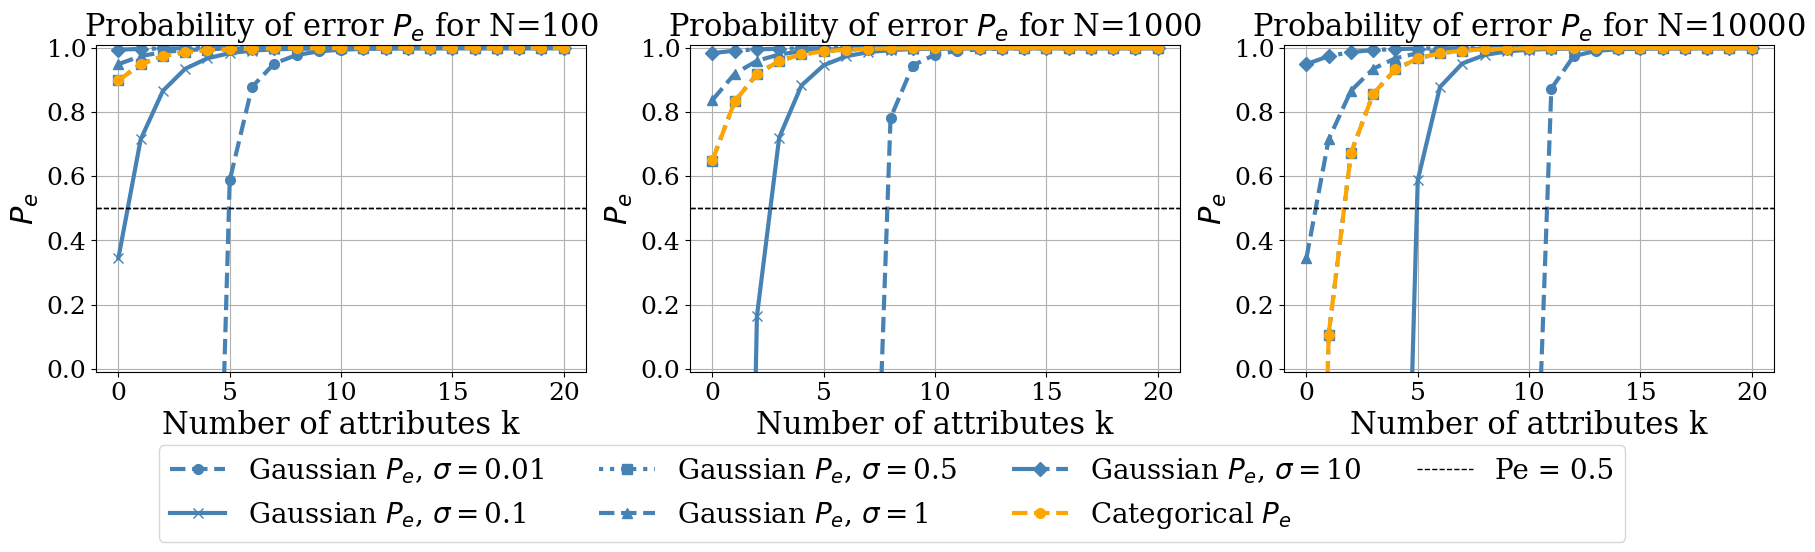

In [6]:
# Create the figure and axes for 1 row and 3 columns of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))  # Adjusted figsize for 3 subplots side by side

# Plot for different values of n on separate subplots
n_values = [100, 1000, 10**4]

# List to store handles and labels for the legend
handles = []
labels = []

for i, n in enumerate(n_values):
    ax = axes[i]
    
    # Plot the normal lower bounds first
    plot_lower_bound_normal(ax, n)
    
    # Plot the categorical lower bounds last, so they are on top
    plot_lower_bound_categorical(ax, n, color='orange')
    
    # Collect handles and labels for the legend (only from the first subplot)
    if i == 0:
        handle, label = ax.get_legend_handles_labels()
        handles += handle
        labels += label

# Create a single legend for the entire figure, stacked by adjusting ncol
fig.legend(handles, labels, loc='lower center', fontsize=20, ncol=4, bbox_to_anchor=(0.5, -0.41))  # Move legend further down

# Adjust the spacing of the subplots to make room for the legend
plt.tight_layout(rect=[0, 0.05, 1, 1])  # Adjust bottom margin
plt.subplots_adjust(bottom=0.05)  # Move subplots up

# Display the plot
plt.show()

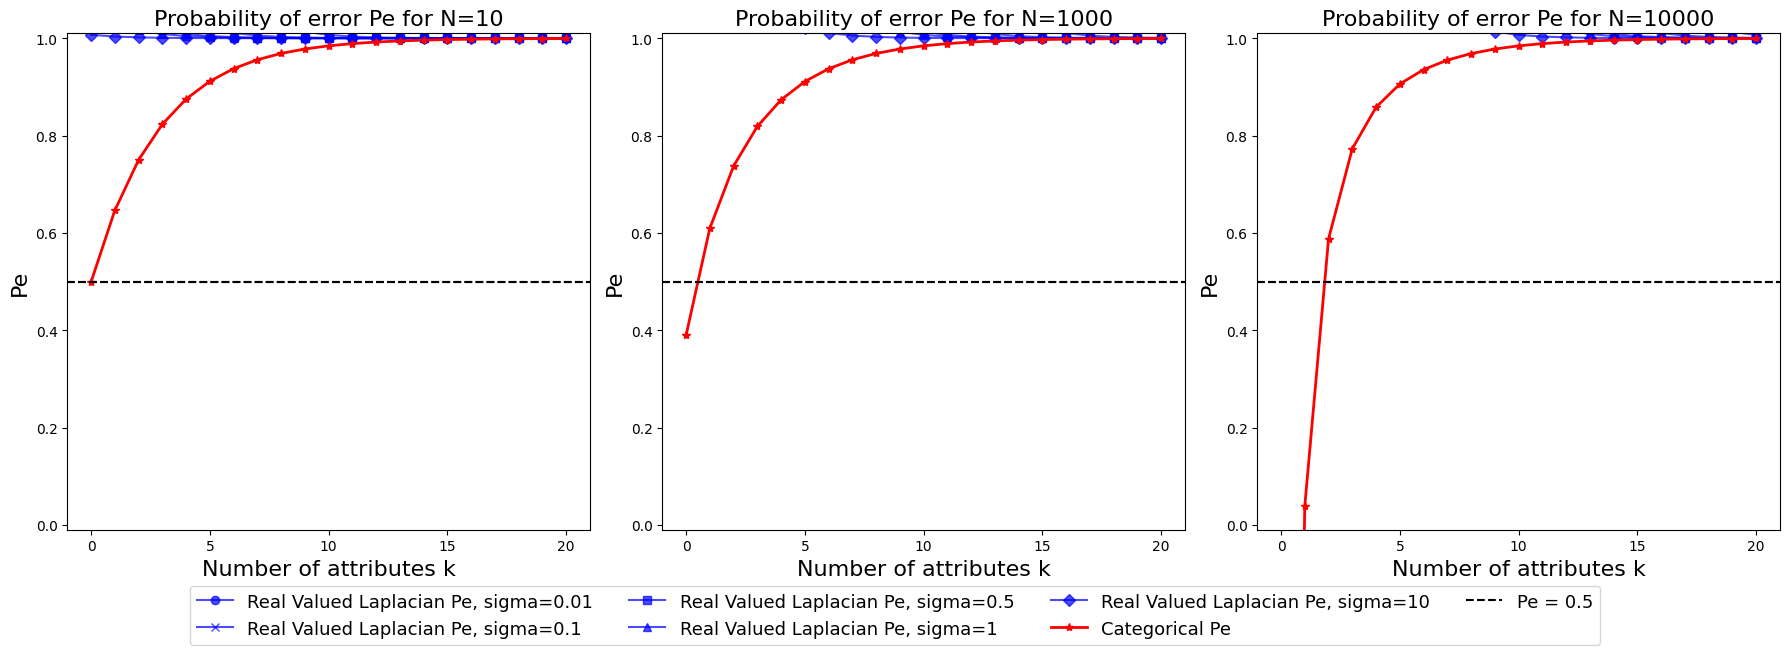

In [10]:
# Create the figure and axes for 1 row and 3 columns of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))  # Adjusted figsize for 3 subplots side by side

# Plot for different values of n on separate subplots
n_values = [10, 1000, 10**4]
# List to store handles and labels for the legend
handles = []
labels = []

for i, n in enumerate(n_values):
    ax = axes[i]
    
    # Plot the laplacian lower bounds
    plot_lower_bound_laplacian(ax, n)

    # Plot the categorical lower bounds last, so they are on top
    plot_lower_bound_categorical(ax, n, color='red')
    
    # Collect handles and labels for the legend (only from the first subplot)
    if i == 0:
        handle, label = ax.get_legend_handles_labels()
        handles += handle
        labels += label

# Create a single legend for the entire figure
fig.legend(handles, labels, loc='lower center', fontsize=13, ncol=4, bbox_to_anchor=(0.5, -0.1))

# Adjust layout to prevent overlap and display the plot
plt.tight_layout()
plt.show()

## Plot for lower bound normal variable

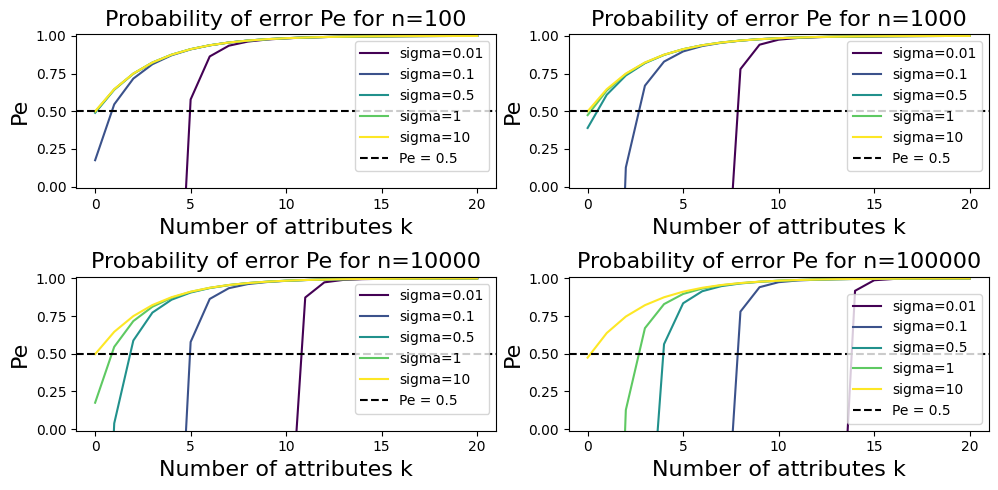

In [5]:
# Create the figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

# Plot for n=100, n=1000, and n=10000 on separate subplots
n_values = [100, 1000, 10 ** 4, 10 ** 5, 10 ** 6, 10 ** 7]
for i in range(2):
    for j in range(2):
        n = n_values[2*i + j]
        plot_lower_bound_normal(axes[i, j], n)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

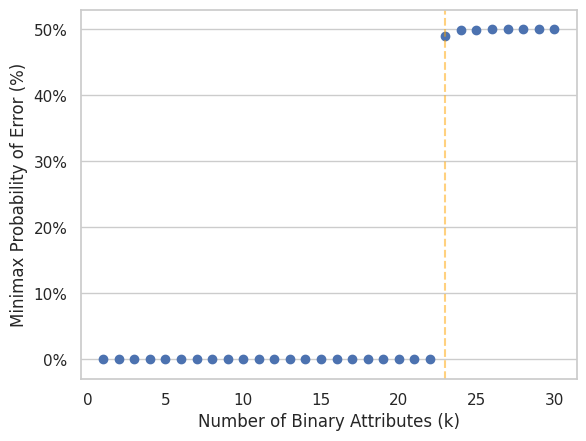

In [21]:

N = 8 * 10**(9)
k = (1 + np.arange(30))
d = 2** k
m = N / d
eps = 0.01
sig = 0.1
bound = 50 * np.maximum(1 - (1 / (2*np.sqrt(d)))* np.exp((m*eps**2)/(2*sig**2)), 0)

import matplotlib.ticker as mtick
sns.set()
with sns.axes_style("whitegrid"):
  fig = plt.figure()

  a = fig.add_subplot(1,1,1)
  a.scatter(k, bound)#, linestyles='', marker='o', edgecolor = 'black', linewidth = 1)
  plt.xlabel('Number of Binary Attributes (k)')
  plt.ylabel('Minimax Probability of Error (%)')
  fmt = '%.0f%%'
  xticks = mtick.FormatStrFormatter(fmt)
  a.yaxis.set_major_formatter(xticks)
  a.grid(axis='x')
  plt.axvline(23, 0,50, color = 'orange', linestyle='--', alpha=0.5, label = 'm = Number of groups')
  plt.ylim([-3, 53])   

## Max number of attributes

k value where equation crosses 1/2: 17.9706


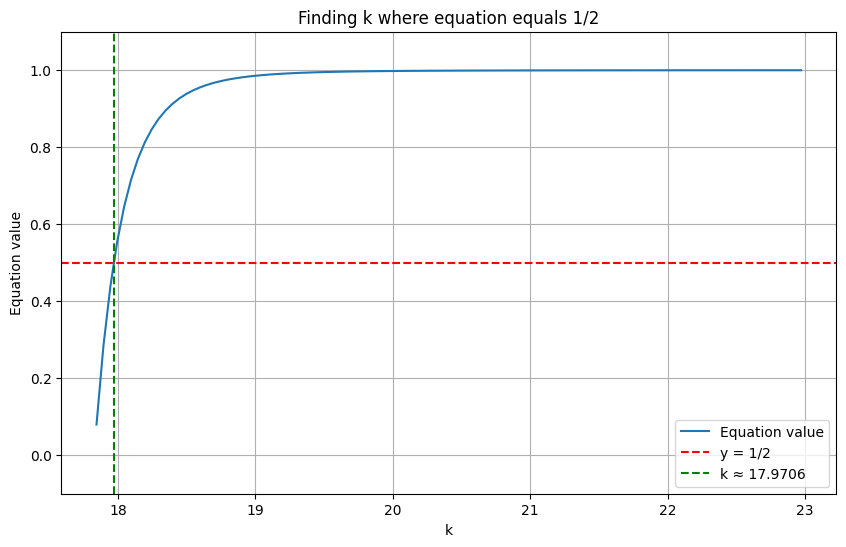

In [8]:
#Categorical Case
def equation_log(k):
    """
    Compute the equation using logarithms to avoid overflow.
    Returns the difference between LHS and 1/2.
    """
    d = 2**k
    m = n / d
    # Take log of (1 + 4ε²)^m - 1
    # log((1 + 4ε²)^m - 1) = m * log(1 + 4ε²) + log(1 - 1/(1 + 4ε²)^m)
    term1 = m * np.log1p(4 * epsilon**2)
    # Compute 1/(2√d)
    log_denominator = np.log(2) + 0.5 * np.log(d)
    # Final result
    result = 1 - np.exp(-log_denominator + 0.5 * term1)
    return result - 0.5

# Parameters
epsilon = 0.01
n = 8 * 10**9

# Binary search to find k
k_min, k_max = 1, 30
tolerance = 1e-6
max_iterations = 100

for _ in range(max_iterations):
    k_mid = (k_min + k_max) / 2
    mid_value = equation_log(k_mid)
    
    if abs(mid_value) < tolerance:
        break
    elif mid_value < 0:
        k_min = k_mid
    else:
        k_max = k_mid

k_solution = k_mid
print(f"k value where equation crosses 1/2: {k_solution:.4f}")

# Plot around the solution
k_range = np.linspace(k_solution - 5, k_solution + 5, 200)
y_values = [equation_log(k) + 0.5 for k in k_range]

# Create mask for values above the minimum threshold (e.g., -0.1)
min_threshold = -0.1
y_values = np.array(y_values)
mask = y_values >= min_threshold

plt.figure(figsize=(10, 6))
plt.plot(k_range[mask], y_values[mask], label='Equation value')
plt.axhline(0.5, color='r', linestyle='--', label='y = 1/2')
plt.axvline(k_solution, color='g', linestyle='--', label=f'k ≈ {k_solution:.4f}')
plt.grid(True)
plt.xlabel('k')
plt.ylabel('Equation value')
plt.title('Finding k where equation equals 1/2')
plt.legend()

# Set y-axis limits explicitly
plt.ylim(min_threshold, max(y_values) + 0.1)  # Add small padding at the top
plt.show()

k value where equation crosses 1/2: 21.3651


/tmp/ipykernel_2679392/2654618845.py:13: RuntimeWarning: overflow encountered in exp
  exp_term = np.exp((m * epsilon**2) / (2 * sigma**2))


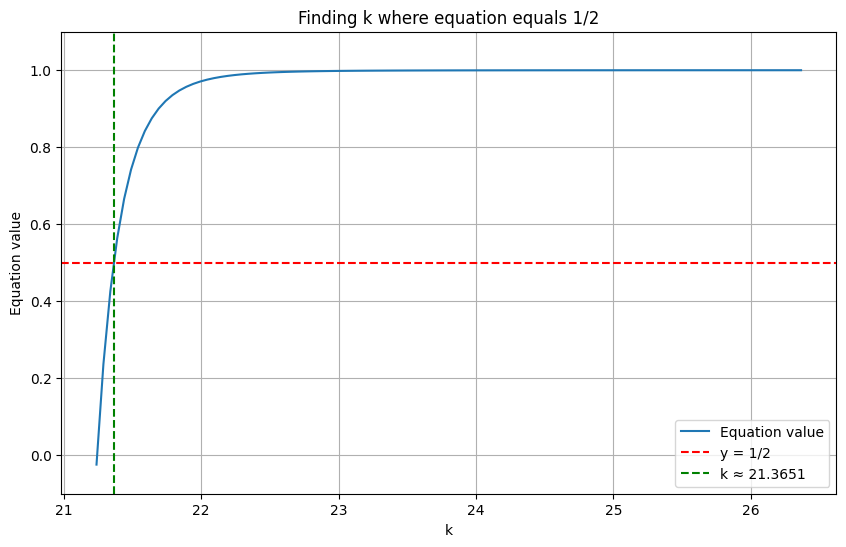

In [9]:
#Gaussian Case
def equation_log_normal(k):
    """
    Compute the equation for the normal distribution case.
    Returns the difference between LHS and 1/2.
    """
    d = 2**k
    m = n / d
    sigma = 0.1  # You can adjust this value
    epsilon = 0.01
    
    # Compute exp(mε²/σ²) - 1 using log space
    exp_term = np.exp((m * epsilon**2) / (2 * sigma**2))
    
    # Compute 1/(2√d)
    denominator = 2 * np.sqrt(d)
    
    # Final result
    result = 1 - (1/denominator) * (exp_term - 1)**(1/2)
    
    return result - 0.5

# Parameters
n = 8 * 10**9

# Binary search to find k
k_min, k_max = 1, 30
tolerance = 1e-6
max_iterations = 100

for _ in range(max_iterations):
    k_mid = (k_min + k_max) / 2
    mid_value = equation_log_normal(k_mid)
    
    if abs(mid_value) < tolerance:
        break
    elif mid_value < 0:
        k_min = k_mid
    else:
        k_max = k_mid

k_solution = k_mid
print(f"k value where equation crosses 1/2: {k_solution:.4f}")

# Plot around the solution
k_range = np.linspace(k_solution - 5, k_solution + 5, 200)
y_values = [equation_log_normal(k) + 0.5 for k in k_range]

# Create mask for values above the minimum threshold
min_threshold = -0.1
y_values = np.array(y_values)
mask = y_values >= min_threshold

plt.figure(figsize=(10, 6))
plt.plot(k_range[mask], y_values[mask], label='Equation value')
plt.axhline(0.5, color='r', linestyle='--', label='y = 1/2')
plt.axvline(k_solution, color='g', linestyle='--', label=f'k ≈ {k_solution:.4f}')
plt.grid(True)
plt.xlabel('k')
plt.ylabel('Equation value')
plt.title('Finding k where equation equals 1/2')
plt.legend()

# Set y-axis limits explicitly
plt.ylim(min_threshold, max(y_values) + 0.1)  # Add small padding at the top
plt.show()


In [2]:
from sympy import symbols, Sum, Eq, sqrt, solve, Rational

# Define the variables
k, epsilon, j = symbols('k epsilon j', positive=True, real=True)
d = 2**k  # d = 2^k

# Define the general m_j (no assumptions about its form)
m_j = symbols('m_j', real=True, positive=True)

# Define the summation term
summation = Sum((1 + 4 * epsilon**2)**m_j - 1, (j, 1, d))

# Define the full equation
f_k = 1 - (1 / (2 * sqrt(d))) * sqrt((1 / d) * summation)
equation = Eq(f_k, Rational(1, 2))  # Set f(k) = 0.5

# Solve symbolically for k
solution = solve(equation, k)
print("Symbolic solution for k (exact, no assumptions about m_j):")
print(solution)

NotImplementedError: 
No algorithms are implemented to solve equation 1/2 - sqrt(_Dummy_320)/(2*2**k)